<h2 style='color:purple' align='center'>Predicting Digit in Images</h2>


<p><b>
We have a dataset containing images of different Digits ranging from 0 to 9. We are going to analyze this dataset
and build a prediction function that can predict digit by taking an image as input.</b></p>

### 1. Importing libraries and their associated methods


In [34]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<br>

### 2. Loading the Dataset

In [35]:
from sklearn.datasets import load_digits
digits = load_digits()

<br>

### 3. Exploring Dataset

#### 3.1 - Determining the total number of images and labels

In [36]:
print("Image Data Shape",digits.data.shape)
print("Label Data Shape",digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


#### 3.2 - Displaying some of the images and labels

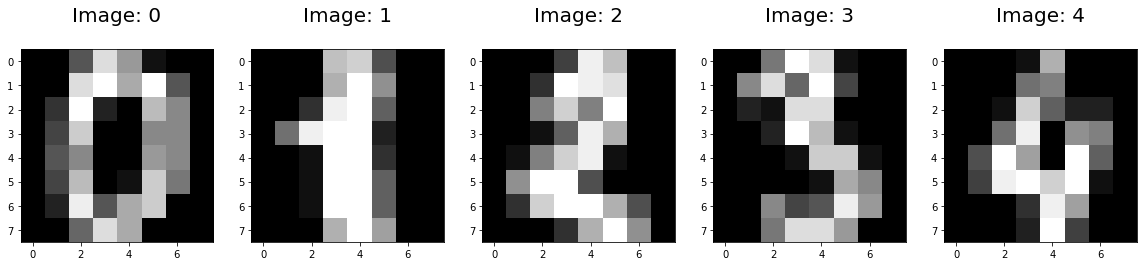

In [37]:
plt.figure(figsize=(20,4))
for index, (image,label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index+1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title("Image: %i\n"% label, fontsize = 20)

### 4. Dividing dataset into Training and Test set

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data , digits.target, test_size=0.23, random_state=2)

In [39]:
print(X_train.shape)

(1383, 64)


In [40]:
print(y_train.shape)

(1383,)


In [41]:
print(X_test.shape)

(414, 64)


In [42]:
print(y_test.shape)

(414,)


### 5. Model Training

#### 5.1 - import the Logistic Regression model

In [43]:
from sklearn.linear_model import LogisticRegression

#### 5.2 - Making an instance of the model and training it

In [44]:
regressor = LogisticRegression(solver = "liblinear", multi_class = "ovr")
regressor.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

#### 5.3 - Predicting the output of the first element of the test set

In [45]:
# Returns a Numpy Array
# Predict for one Observation (image)

print(regressor.predict(X_test[0].reshape(1, -1)))

[4]


#### 5.4 - Predicting the output of the first 10 elements of the test set

In [46]:
print(regressor.predict(X_test[0:10]))

[4 0 9 1 8 7 1 5 1 6]


#### 5.5 - Predicting for the entire dataset

In [47]:
predictions = regressor.predict(X_test)

#### 5.6 - Determining the accuracy of the model

In [48]:
score = regressor.score(X_test, y_test)
print(score)

0.9420289855072463


#### 5.7 - Printing the confusion Matrix

In [49]:
from sklearn import metrics 

confusionMatrix = metrics.confusion_matrix(y_test, predictions)
print(confusionMatrix)

[[38  0  0  0  0  0  0  0  0  0]
 [ 0 44  0  1  0  0  0  0  2  1]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 37  0  0  0  3  2  0]
 [ 0  2  0  0 34  0  0  0  1  1]
 [ 0  0  0  0  0 46  0  0  0  0]
 [ 0  0  0  0  0  0 40  0  1  0]
 [ 0  0  0  0  0  0  0 45  1  0]
 [ 0  2  0  0  0  0  0  0 35  1]
 [ 0  0  0  1  0  1  0  1  3 28]]


#### 5.8 - Representing the confusion matrix in a heat map

(10.0, 0)

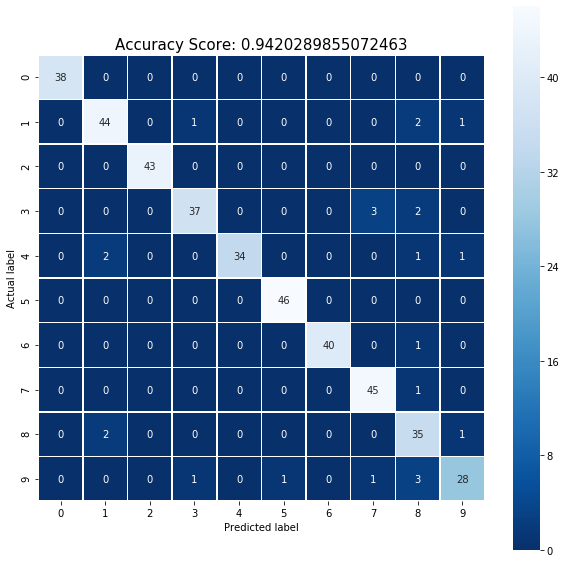

In [50]:
plt.figure(figsize=(10, 10))
ax = sns.heatmap(confusionMatrix, annot=True, linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel("Actual label");
plt.xlabel("Predicted label");
all_sample_title = "Accuracy Score: {0}".format(score)
plt.title(all_sample_title, size = 15);
# ax.get_ylim()
ax.set_ylim(10.0, 0)